<h1 style="text-align: center;">Arabic Search Engine SANAD<h1>

Prepare libraries

In [ ]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import os
import zipfile
import pandas as pd
from google.colab import drive

Load data

In [ ]:
drive.mount('/content/drive')
!ls "/content/drive/My Drive/NLP/project/DataSet"

Mounted at /content/drive
ls: cannot access '/content/drive/My Drive/NLP/project/DataSet': No such file or directory


# مهمة 01  : تحميل البيانات

## [1.1] Dataset explore - don't run this

In [ ]:
#!unzip -u "/content/drive/My Drive/NLP/project/DataSet/SANAD_SUBSET.zip" -d "/content/drive/My Drive/NLP/project/DataSet/"

In [ ]:
import os
import pandas as pd

main_dir = "/content/drive/My Drive/nlp/project/DataSet/"
folder = "akhbarona"

In [ ]:
def process_subset(folder, subset):
    all_data = []
    folder_path = os.path.join(main_dir, folder, subset)
    for root, _, files in os.walk(folder_path):
        category = os.path.basename(root)
        for file_name in files:
            file_path = os.path.join(root, file_name)
            with open(file_path, encoding="utf-8") as f:
                    content = f.read()
                    all_data.append({"category": category, "content": content, "folder": folder})

    df = pd.DataFrame(all_data)
    return df

In [ ]:
train_dataset = process_subset(folder, "Train")

print("Train Dataset:")
print(train_dataset.head())

Train Dataset:
Empty DataFrame
Columns: []
Index: []


In [ ]:
test_dataset = process_subset(folder, "Test")

print("\nTest Dataset:")
print(test_dataset.head())


Test Dataset:
Empty DataFrame
Columns: []
Index: []


In [ ]:
train_counts = train_dataset.groupby('category')['content'].count()
print("text counts in train dataset:\n", train_counts)

KeyError: 'category'

In [ ]:
folder = "khaleej"

train_dataset2 = process_subset(folder, "Train")
test_dataset2 = process_subset(folder, "Test")

In [ ]:
train_counts2 = train_dataset2.groupby('category')['content'].count()
print("text counts in train dataset:\n", train_counts2)

text counts in train dataset:
 category
Finance      460
Medical     5850
Politics    5850
Religion     135
Sports      5850
Tech        5850
Name: content, dtype: int64


In [ ]:
folder = "arabiya"

train_dataset3 = process_subset(folder, "Train")
test_dataset3 = process_subset(folder, "Test")

In [ ]:
train_counts3 = train_dataset3.groupby('category')['content'].count()
print("text counts in train dataset:\n", train_counts3)

text counts in train dataset:
 category
Finance     3330
Medical     3330
Politics    3330
Sports      3330
Tech        3330
Name: content, dtype: int64


In [ ]:
train_df = pd.concat([train_dataset, train_dataset2, train_dataset3], ignore_index=True)
test_df = pd.concat([test_dataset, test_dataset2, test_dataset3], ignore_index=True)

print("Combined Training Data:\n", train_df.head())
print("\nCombined Testing Data:\n", test_df.head())

Combined Training Data:
   category                                            content     folder
0   Sports  Title\nالملاعب الأوروبية : مُباريات اليوم السب...  akhbarona
1   Sports  Title\nالسر وراء تأجيل قرعة نصف نهائي "دوري ال...  akhbarona
2   Sports  Title\nالجماهير تُحاصر منزل محمد صلاح في القاه...  akhbarona
3   Sports  Title\nحارس بوسني يدافع عن مرماه ورصاصة في رأس...  akhbarona
4   Sports  Title\nبارقة أمل قد تؤهل إيطاليا إلى كأس العال...  akhbarona

Combined Testing Data:
   category                                            content     folder
0   Sports  Title\nبيكهام وريفالدو يقودان أساطير ريال مدري...  akhbarona
1   Sports  Title\nلافيتزي قد يجاور ميسي وأغويرو في هجوم ا...  akhbarona
2   Sports  Title\n"الهوليغانز" الروس في المونديال.. لعبة ...  akhbarona
3   Sports  Title\nإشبيلية ينفرد بالصدارة وليفربول يواصل ن...  akhbarona
4   Sports  Title\nرئيس أوروغواي يعلن موقفه تجاه العضاض "س...  akhbarona


In [ ]:
train_df.to_csv("/content/drive/My Drive/nlp/project/train.csv",index=False)
test_df.to_csv("/content/drive/My Drive/nlp/project/test.csv",index=False)

## [1.2]

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/nlp/project/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/nlp/project/test.csv")


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82855 entries, 0 to 82854
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  82855 non-null  object
 1   content   82855 non-null  object
 2   folder    82855 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [ ]:
train_df.describe()

,category,content,folder
count,82855,82855,82855
unique,7,82694,3
top,Sports,Title\nللتواصل\n\nBody\nمن إعداد: ليلى الشافعي...,akhbarona
freq,15210,16,42210


In [ ]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

print("\nData types of each column:")
print(train_df.dtypes)

print("\nNumber of missing values in each column:")
print(train_df.isnull().sum())

The dataset has 82855 rows and 3 columns.

Data types of each column:
category    object
content     object
folder      object
dtype: object

Number of missing values in each column:
category    0
content     0
folder      0
dtype: int64


In [ ]:
train_df['content'].duplicated().sum()

161

In [ ]:
duplicate_rows = train_df[train_df['content'].duplicated()]
print(duplicate_rows)

       category                                            content     folder
10106   Medical  Title\nكم كيس (شيبس) يمكن للطفل أكله في اليوم؟...  akhbarona
11016   Medical  Title\nدراسة: السكن قرب الطرق المزدحمة يزيد من...  akhbarona
11034   Medical  Title\nهكذا تصيبنا مستحضرات التجميل والنظافة ا...  akhbarona
11299   Medical  Title\nخطوات تنظيف الرئتين في 3 أيام\n\nBody\n...  akhbarona
11763   Medical  Title\nمتى يستدعي الصداع استشارة الطبيب؟\n\nBo...  akhbarona
...         ...                                                ...        ...
36165  Religion  Title\nللتواصل\n\nBody\nليلى الشافعي \nالإيمان...  akhbarona
36167  Religion  Title\nكيف ينجو الإنسان من عذاب القبر ؟\n\nBod...  akhbarona
37807   Culture  Title\nأسطورة يونايتد: "مورينيو عار على الفريق...  akhbarona
39956   Culture  Title\nالباحث المغربي يقطين يفوز بجائزة الشيخ ...  akhbarona
55788  Politics  Body\nنشرت مجموعة قراصنة الإنترنت أنونيموس الل...    khaleej

[161 rows x 3 columns]


In [ ]:
train_df = train_df.drop_duplicates(subset=["content"], keep="first")

print(f"Number of rows after removing duplicates: {len(train_df)}")
print("Data after removing duplicates:")
print(train_df.head())

Number of rows after removing duplicates: 82694
Data after removing duplicates:
  category                                            content     folder
0   Sports  Title\nالملاعب الأوروبية : مُباريات اليوم السب...  akhbarona
1   Sports  Title\nالسر وراء تأجيل قرعة نصف نهائي "دوري ال...  akhbarona
2   Sports  Title\nالجماهير تُحاصر منزل محمد صلاح في القاه...  akhbarona
3   Sports  Title\nحارس بوسني يدافع عن مرماه ورصاصة في رأس...  akhbarona
4   Sports  Title\nبارقة أمل قد تؤهل إيطاليا إلى كأس العال...  akhbarona


## [1.3]

In [ ]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The dataset has 82694 rows and 3 columns.


In [ ]:
train_df.head()

,category,content,folder
0,Sports,Title\nالملاعب الأوروبية : مُباريات اليوم السب...,akhbarona
1,Sports,"Title\nالسر وراء تأجيل قرعة نصف نهائي ""دوري ال...",akhbarona
2,Sports,Title\nالجماهير تُحاصر منزل محمد صلاح في القاه...,akhbarona
3,Sports,Title\nحارس بوسني يدافع عن مرماه ورصاصة في رأس...,akhbarona
4,Sports,Title\nبارقة أمل قد تؤهل إيطاليا إلى كأس العال...,akhbarona


In [ ]:
sports_df = train_df[train_df['category'] == 'Sports']
sports_df.shape[0]

15210

# Multilingual-e5-small Retriever

In [ ]:
#!pip install --upgrade pip
#!pip install farm-haystack[all]

#!pip install farm-haystack==1.20.1
!pip install langdetect
#!pip install gensim==3.8.2
!pip3 install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b645b8da78a14d6787a84a8cbba5678f55b014c00185ada5fea0b597c3f0c17a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer , AutoModel
import langdetect
import random
import numpy as np
import plotly.graph_objects as go
import torch.nn.functional as F
from torch import Tensor
import re
#from haystack import Pipeline
import tensorflow as tf
import torch
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
# from gensim.summarization import bm25

#from gensim.summarization import BM25
from nltk.tokenize import word_tokenize
#from haystack.nodes.preprocessor import PreProcessor

## Dataset Analysis

In [ ]:
print("Missing values per column:")
print(train_df.isnull().sum())

Missing values per column:
category    0
content     0
folder      0
dtype: int64


In [ ]:
print("Duplicate rows count:")
print(train_df.duplicated().sum())

Duplicate rows count:
0


In [ ]:
train_df['content_length'] = train_df['content'].apply(len)
train_df['word_count'] = train_df['content'].apply(lambda x: len(str(x).split()))

print("Content Length Stats:")
print(train_df[['content_length', 'word_count']].describe())

Content Length Stats:
       content_length    word_count
count    82694.000000  82694.000000
mean      1641.404249    274.420393
std       1564.399397    267.614210
min          6.000000      1.000000
25%        784.000000    130.000000
50%       1210.000000    201.000000
75%       1923.000000    320.000000
max      34240.000000   6219.000000


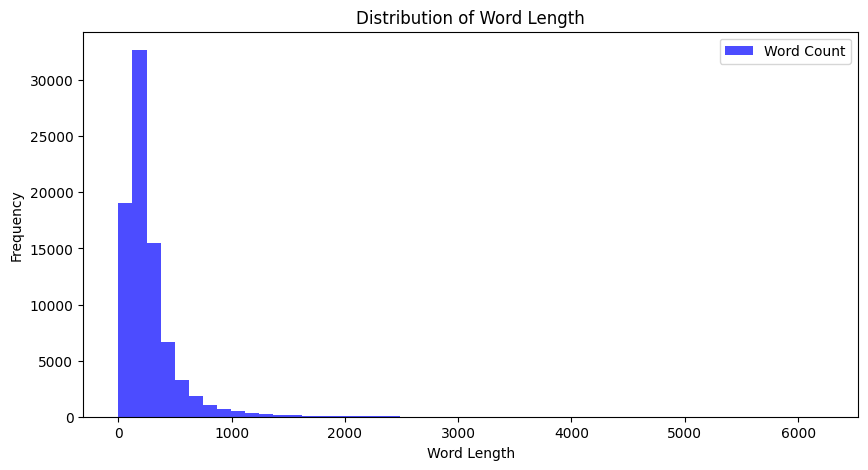

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train_df['word_count'], bins=50, alpha=0.7, color='blue', label='Word Count')
plt.title("Distribution of Word Length")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Category Counts:
category
Sports      15210
Medical     15204
Politics    15201
Tech        15198
Finance      9819
Religion     6034
Culture      6028
Name: count, dtype: int64


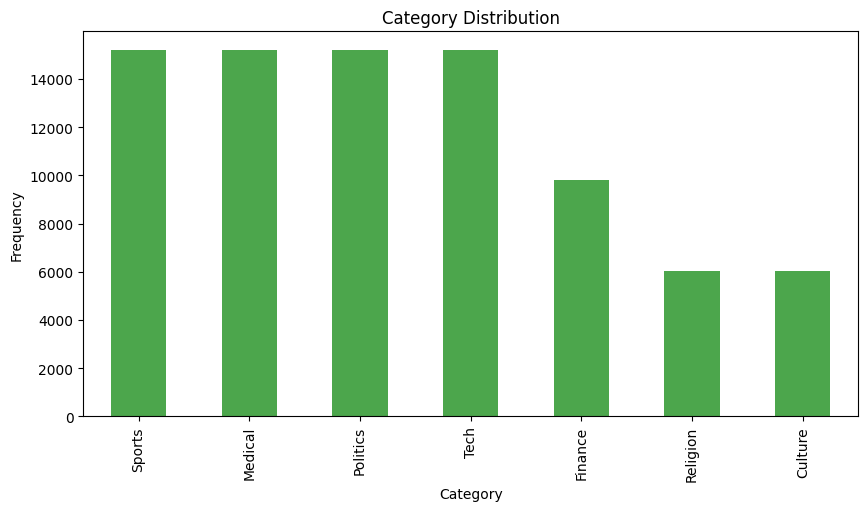

In [ ]:
print("Category Counts:")
print(train_df['category'].value_counts())

train_df['category'].value_counts().plot(kind='bar', figsize=(10, 5), color='green', alpha=0.7)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("Folder Counts:")
print(train_df['folder'].value_counts())


Folder Counts:
folder
akhbarona    42050
khaleej      23994
arabiya      16650
Name: count, dtype: int64


In [ ]:
train_df['language'] = train_df['content'].apply(lambda x: langdetect.detect(x[:200]) if isinstance(x, str) else 'unknown')

print("\nLanguage Distribution:")
print(train_df['language'].value_counts())


Language Distribution:
language
ar    82640
da       44
en        5
no        2
tr        2
fr        1
Name: count, dtype: int64


In [ ]:
train_df = train_df[train_df['language'] == 'ar']

print("\nLanguage Distribution:")
print(train_df['language'].value_counts())


Language Distribution:
language
ar    82640
Name: count, dtype: int64


In [ ]:
train_df.head()

,category,content,folder,content_length,word_count,language
0,Sports,Title\nالملاعب الأوروبية : مُباريات اليوم السب...,akhbarona,731,109,ar
1,Sports,"Title\nالسر وراء تأجيل قرعة نصف نهائي ""دوري ال...",akhbarona,1589,257,ar
2,Sports,Title\nالجماهير تُحاصر منزل محمد صلاح في القاه...,akhbarona,1008,170,ar
3,Sports,Title\nحارس بوسني يدافع عن مرماه ورصاصة في رأس...,akhbarona,1122,201,ar
4,Sports,Title\nبارقة أمل قد تؤهل إيطاليا إلى كأس العال...,akhbarona,1760,302,ar


## Analyze Tokenization

In [ ]:
with tf.device('/GPU:0'):
  tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-small')
  model = AutoModel.from_pretrained('intfloat/multilingual-e5-small')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

In [ ]:
train_df['token_count'] = train_df['content'].apply(lambda x: len(tokenizer.encode(x, truncation=False)))

print("\nToken Count Statistics:")
print(train_df['token_count'].describe())

Token indices sequence length is longer than the specified maximum sequence length for this model (1252 > 512). Running this sequence through the model will result in indexing errors



Token Count Statistics:
count    82640.000000
mean       490.744688
std        506.579384
min          7.000000
25%        229.000000
50%        355.000000
75%        563.000000
max      13221.000000
Name: token_count, dtype: float64


<ipython-input-20-60cc5f9ba27e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['token_count'] = train_df['content'].apply(lambda x: len(tokenizer.encode(x, truncation=False)))


In [ ]:
print("Word Count Statistics:")
print(train_df['word_count'].describe())

Word Count Statistics:
count    82640.000000
mean       274.305808
std        267.198513
min          3.000000
25%        130.000000
50%        201.000000
75%        319.000000
max       6219.000000
Name: word_count, dtype: float64


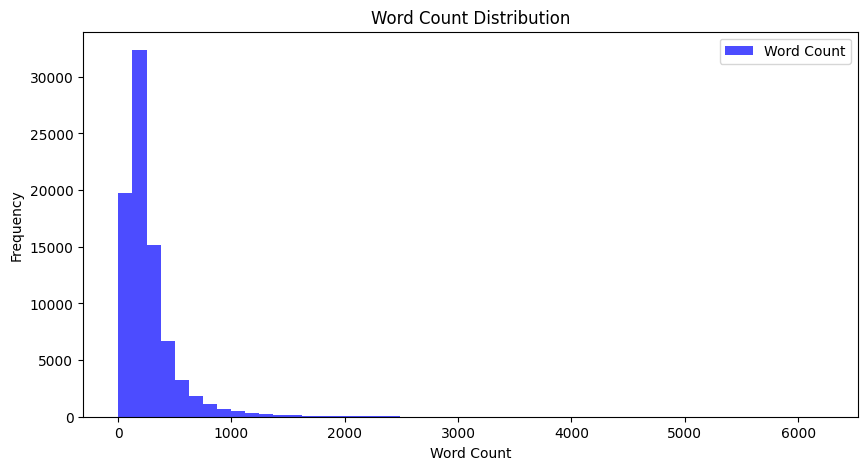

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train_df['word_count'], bins=50, color='blue', alpha=0.7, label='Word Count')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

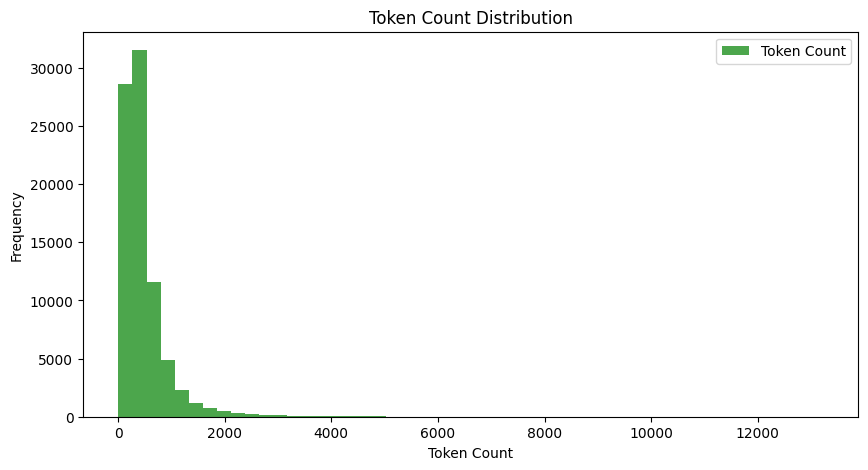

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train_df['token_count'], bins=50, color='green', alpha=0.7, label='Token Count')
plt.title("Token Count Distribution")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
max_token_limit = tokenizer.model_max_length
exceeding_docs = train_df[train_df['token_count'] > max_token_limit]

print(f"Number of documents exceeding {max_token_limit} tokens: {len(exceeding_docs)}")
print(f"Percentage of exceeding documents: {len(exceeding_docs) / len(train_df) * 100:.2f}%")

Number of documents exceeding 512 tokens: 24324
Percentage of exceeding documents: 29.43%


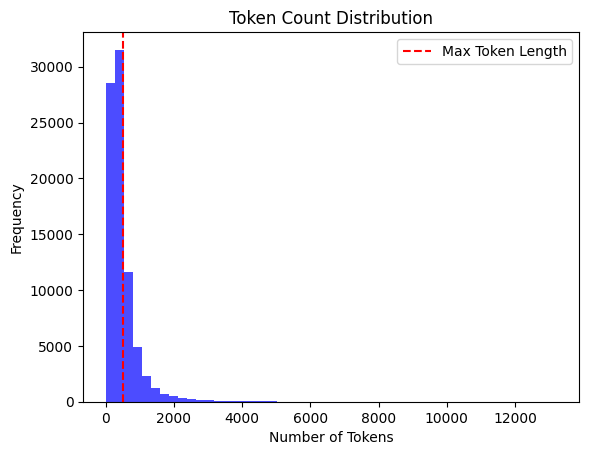

In [ ]:
texts = train_df['content'].dropna().tolist()
token_counts = [len(tokenizer.tokenize(text)) for text in texts]

plt.hist(token_counts, bins=50, color='blue', alpha=0.7)
plt.axvline(x=tokenizer.model_max_length, color='red', linestyle='--', label='Max Token Length')
plt.title('Token Count Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
df = train_df

In [ ]:
def get_random_sample(article, length):
    words = article.split()
    if len(words) <= length:
        return None
    start_index = random.randint(0, len(words) - length)
    return ' '.join(words[start_index:start_index + length])

SAMPLES_PER_WORD_COUNT = 200
word_range = range(140, 275)
token_counts = {}

df.reset_index(drop=True, inplace=True)

# Token distribution analysis
for word_length in word_range:
    token_counts[word_length] = []
    for _ in range(SAMPLES_PER_WORD_COUNT):
        random_index = random.randint(0, len(df) - 1)
        article = df.iloc[random_index]['content']
        sample = get_random_sample(article, word_length)
        if not sample:
            continue
        tokens = tokenizer.tokenize(sample)
        token_counts[word_length].append(len(tokens))

In [ ]:
fig_violin = go.Figure()

for count, counts in token_counts.items():
    if len(counts) == 0:
        continue
    mean = np.mean(counts)
    std = np.std(counts)
    z_score_512 = (512 - mean) / std if std > 0 else 0

    fig_violin.add_trace(go.Violin(
        y=counts,
        name=str(count),
        box_visible=True,
        meanline_visible=True,
        hoverinfo="y",
        text=f"Mean: {mean:.2f}, Std Dev: {std:.2f}, Z-score for 512: {z_score_512:.2f}"
    ))

fig_violin.add_shape(
    type="line",
    x0=0,
    x1=1,
    xref="paper",
    y0=512,
    y1=512,
    line=dict(color="Red", width=2)
)

fig_violin.update_layout(
    title="Token Counts for Various Word Counts",
    xaxis_title="Word Count",
    yaxis_title="Token Counts"
)


In [ ]:
word_counts = list(token_counts.keys())
z_scores = []

for count, counts in token_counts.items():
    if len(counts) == 0:
        continue
    mean = np.mean(counts)
    std = np.std(counts)
    z_scores.append((512 - mean) / std if std > 0 else 0)

fig_bar = go.Figure(go.Bar(
    x=word_counts,
    y=z_scores,
    text=[f"{z:.2f}" for z in z_scores],
    textposition='auto',
    marker_color='royalblue'
))

fig_bar.update_layout(
    title="Z-Scores for 512 Tokens Across Different Word Counts",
    xaxis_title="Word Count",
    yaxis_title="Z-Score for 512"
)

fig_bar.show()

## Chunking

In [ ]:
print(train_df.loc[99]['content'])

Title
اختلاف علماء الجزائر حول صيام لاعبي المنتخب في المونديال

Body
اختلاف علماء الجزائر حول صيام لاعبي المنتخب في المونديال

 
بدأت التساؤلات في الصحافة الجزائرية الاربعاء حول صيام اللاعبين الجزائريين في حال تاهل المنتخب الى الدور الثاني لمونديال 2014 المقام حاليا في البرازيل والذي يترافق مع شهر رمضان.ويحتاج المنتخب الجزائري لنقطة واحدة في حال التعادل مع روسيا غدا الخميس لكي يبلغ الدور الثاني لاول مرة في تاريخ مشاركاته الاربع في نهائيات كأس العالم.وانقسمت الفتاوى في الجزائر بين المتساهل في إعفاء اللاعبين من الصيام والمتشدد في مطالبتهم بالصوم "على اعتبار ان اليوم قصير في البرازيل" ويمكن تحمل مشقة عدم الاكل او الشرب كما تنص عليه الشريعة الاسلامية."ويرى الشيخ محمد مكركب، عضو جمعية العلماء المسلمين الجزائريين (غير الحكومية) حرمة الافطار للاعبين في رمضان. وقال "لا يجوز لهم الإفطار في نهار رمضان من أجل اللعب".وكان مكركب يرد على فتوى الشيخ محمد الشريف قاهر، رئيس لجنة الإفتاء في المجلس الإسلامي الأعلى، وهو هيئة رسمية، التي أجاز فيها للاعبين الافطار على اعتبار أنهم مسافرين، والاسلام يبيح للمس

In [ ]:
title_pattern = r"^Title\s*:\s*(.*?)\n"
body_pattern = r"Body\s*:\s*(.*)"

no_title = train_df[train_df['content'].str.contains(title_pattern, regex=True, flags=re.DOTALL)].shape[0]
no_body = train_df[train_df['content'].str.contains(body_pattern, regex=True, flags=re.DOTALL)].shape[0]

print(f"Number of entries without 'Title': {no_title}")
print(f"Number of entries without 'Body': {no_body}")

<ipython-input-21-dafaf046343c>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_title = train_df[train_df['content'].str.contains(title_pattern, regex=True, flags=re.DOTALL)].shape[0]
<ipython-input-21-dafaf046343c>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_body = train_df[train_df['content'].str.contains(body_pattern, regex=True, flags=re.DOTALL)].shape[0]


Number of entries without 'Title': 2
Number of entries without 'Body': 5


In [ ]:
no_title_mask = train_df['content'].str.contains(title_pattern, regex=True, flags=re.DOTALL, na=False)
no_body_mask = train_df['content'].str.contains(body_pattern, regex=True, flags=re.DOTALL, na=False)

# Count entries to be dropped
print(f"Number of entries without 'Title': {no_title_mask.sum()}")
print(f"Number of entries without 'Body': {no_body_mask.sum()}")

# Combine masks and drop rows
rows_to_drop = train_df[no_title_mask | no_body_mask].index
train_df = train_df.drop(index=rows_to_drop).reset_index(drop=True)

print(f"DataFrame size after dropping unmatched rows: {len(train_df)}")

<ipython-input-23-341c386eb285>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_title_mask = train_df['content'].str.contains(title_pattern, regex=True, flags=re.DOTALL, na=False)
<ipython-input-23-341c386eb285>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_body_mask = train_df['content'].str.contains(body_pattern, regex=True, flags=re.DOTALL, na=False)


Number of entries without 'Title': 0
Number of entries without 'Body': 0
DataFrame size after dropping unmatched rows: 82633


In [ ]:
def split_title_body(content):
    title_match = re.search(r'Title\n(.*?)\nBody', content, re.DOTALL)
    if title_match:
        title = title_match.group(1).strip()
    else:
        title = ""
    body_match = re.search(r'Body\n(.*)', content, re.DOTALL)
    if body_match:
        body = body_match.group(1).strip()
    else:
        body = ""

    return title, body

train_df[['title', 'body']] = train_df['content'].apply(lambda x: pd.Series(split_title_body(x)))
print(train_df.head())

  category                                            content     folder  \
0   Sports  Title\nالملاعب الأوروبية : مُباريات اليوم السب...  akhbarona   
1   Sports  Title\nالسر وراء تأجيل قرعة نصف نهائي "دوري ال...  akhbarona   
2   Sports  Title\nالجماهير تُحاصر منزل محمد صلاح في القاه...  akhbarona   
3   Sports  Title\nحارس بوسني يدافع عن مرماه ورصاصة في رأس...  akhbarona   
4   Sports  Title\nبارقة أمل قد تؤهل إيطاليا إلى كأس العال...  akhbarona   

  language  token_count                                              title  \
0       ar          195           الملاعب الأوروبية : مُباريات اليوم السبت   
1       ar          428    السر وراء تأجيل قرعة نصف نهائي "دوري الأبطال"!!   
2       ar          271  الجماهير تُحاصر منزل محمد صلاح في القاهرة..وال...   
3       ar          352           حارس بوسني يدافع عن مرماه ورصاصة في رأسه   
4       ar          497           بارقة أمل قد تؤهل إيطاليا إلى كأس العالم   

                                                body  
0  الملاعب الأوروبي

Data Cleaning

In [ ]:
def remove_extra_whitespaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def normalize_elongated_words(text):
    return re.sub(r'(.)\1+', r'\1', text)

def normalize_arabic(text):
    text = re.sub(r'[\u064B-\u0652]', '', text)
    text = re.sub(r'[إأآ]', 'ا', text)
    text = re.sub(r'ة', 'ه', text)
    return text

def cleaning_text(text, functions):
    for func in functions:
        text = func(text)
    return text

cleaning_functions = [
    remove_extra_whitespaces,
    normalize_elongated_words,
    normalize_arabic,
]

In [ ]:
train_df['body'] = train_df['body'].apply(lambda x: cleaning_text(x, cleaning_functions))
train_df['content'] = train_df['title'] + " " + train_df['body']

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
preprocessor = PreProcessor(
    clean_whitespace=True,
    clean_header_footer=False,
    clean_empty_lines=True,
    split_by="word",
    split_length=225,
    split_overlap=50,
    split_respect_sentence_boundary=True,
    max_chars_check=10_000
)

chunks = []
for idx, row in train_df.iterrows():
    processed = preprocessor.process([{"content": row["body"], "meta": {"id": idx, "title": row["title"]}}])
    for chunk in processed:
        # Access attributes of the Document object
        chunk.meta["source"] = idx
        chunk.meta["title"] = row["title"]
        chunks.append({"chunk": chunk.content, "meta": chunk.meta})

chunks_df = pd.DataFrame([{"chunk": chunk["chunk"], "meta": chunk["meta"]} for chunk in chunks])
chunks_df.to_csv("processed_chunks.csv", index=False)

# Outputs
print("Original DataFrame:")
print(train_df.head())
print("\nProcessed Chunks DataFrame:")
print(chunks_df.head())


Streaming output truncated to the last 5000 lines.
Preprocessing: 100%|██████████| 1/1 [00:00<00:00, 32.68docs/s]


Original DataFrame:
  category                                            content     folder  \
0   Sports  الملاعب الأوروبية : مُباريات اليوم السبت الملا...  akhbarona   
1   Sports  السر وراء تأجيل قرعة نصف نهائي "دوري الأبطال"!...  akhbarona   
2   Sports  الجماهير تُحاصر منزل محمد صلاح في القاهرة..وال...  akhbarona   
3   Sports  حارس بوسني يدافع عن مرماه ورصاصة في رأسه حارس ...  akhbarona   
4   Sports  بارقة أمل قد تؤهل إيطاليا إلى كأس العالم ذكرت ...  akhbarona   

  language  token_count  content_length  word_count  \
0       ar          195             731         109   
1       ar          428            1589         257   
2       ar          271            1008         170   
3       ar          352            1122         201   
4       ar          497            1760         302   

                                               title  \
0           الملاعب الأوروبية : مُباريات اليوم السبت   
1    السر وراء تأجيل قرعة نصف نهائي "دوري الأبطال"!!   
2  الجماهير تُحاصر منزل 

In [ ]:
chunks_path = "/content/drive/MyDrive/nlp/project/processed_chunks.csv"
chunks_df.to_csv(chunks_path, index=False)

In [ ]:
chunks_df.head(2)

,chunk,meta
0,الملاعب الاوروبيه : مباريات اليوم السبت الدوري...,"{'id': 0, 'title': 'الملاعب الأوروبية : مُباري..."
1,"السر وراء تاجيل قرعه نصف نهائي ""دوري الابطال""!...","{'id': 1, 'title': 'السر وراء تأجيل قرعة نصف ن..."


In [ ]:
print(chunks_df.loc[99]['chunk'])

اخبارنا المغربيه عاش جنوب القاره الامريكيه ليله امس على وقع الجوله الثامنه من المباريات الاقصائيه المؤهله الى مونديال 2018 المقر اقامته بروسيا. الجوله شهدت صداما قويا بين البرازيل وكولونبيا في قمه كرويه اعتبرت بمثابه مباراه انتقاميه لرفاق خاميس رودريغيز عقب هزيمتهم في لقاء مونديال البرازيل.هذا واسفرت الجوله عن النتائج التاليه: Perú 2 - Ecuador 1 Brasil 2 - Colombia 1 Venezuela 2 - Argentina 2 Chile 0 - Bolivia 0 Uruguay 4 - Paraguay 0


In [ ]:
print(chunks_df.loc[99]['meta'])

{'id': 77, 'title': 'نتائج مباريات أمريكا اللاتينية المؤهلة لمونديال روسيا', '_split_id': 0, '_split_overlap': [], 'source': 77}


## Embeddings

In [ ]:
chunks_path = "/content/drive/MyDrive/nlp/project/processed_chunks.csv"
chunks = pd.read_csv(chunks_path)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-small')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-small')

model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(250037, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [ ]:
def compute_embeddings(text, model, tokenizer, device):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: (batch_size, hidden_dim)
    return cls_embedding.squeeze().cpu().numpy()

In [ ]:
dont run

In [ ]:
embeddings = []
ids = []
with tqdm(total=len(chunks), desc="Processing chunks") as pbar:
  for idx, row in chunks.iterrows():
    chunk = row['chunk']
    meta = row['meta']
    emb = compute_embeddings(chunk, model, tokenizer, device)
    embeddings.append(emb)
    ids.append(meta)
    pbar.update(1)

embeddings_path = "/content/drive/MyDrive/nlp/project/embeddings.npy"
metadata_path = "/content/drive/MyDrive/nlp/project/metadata.npy"
np.save(embeddings_path, np.array(embeddings))
np.save(metadata_path, np.array(ids))

## Similarity Search

In [ ]:
embeddings_path = "/content/drive/MyDrive/nlp/project/embeddings.npy"
metadata_path = "/content/drive/MyDrive/nlp/project/metadata.npy"
embeddings = np.load(embeddings_path)
metadata = np.load(metadata_path, allow_pickle=True)

In [ ]:
def get_top_k_similar(query_embedding, document_embeddings, k=5):
    """
    Compute cosine similarity between query and document embeddings.
    Args:
        query_embedding (np.ndarray): The embedding vector for the query.
        document_embeddings (np.ndarray): Embedding vectors for the documents.
        k (int): Number of top similar results to return.
    Returns:
        top_k_indices (list): Indices of top-k similar documents.
        top_k_scores (list): Similarity scores of top-k similar documents.
    """
    similarity_scores = cosine_similarity(query_embedding.reshape(1, -1), document_embeddings)
    similarity_scores = similarity_scores.flatten()

    top_k_indices = similarity_scores.argsort()[-k:][::-1]
    top_k_scores = similarity_scores[top_k_indices]

    return top_k_indices, top_k_scores

In [ ]:
query_text = "نتائج مباريات كرة القدم"
query_embedding = compute_embeddings(query_text, model, tokenizer, device)

top_k_indices, top_k_scores = get_top_k_similar(query_embedding, embeddings, k=5)

print("Top-k Similar Results:")
for idx, score in zip(top_k_indices, top_k_scores):
    print(f"Document ID: {metadata[idx]}, Similarity Score: {score:.4f}")

Top-k Similar Results:
Document ID: {'id': 5492, 'title': 'أبرز مباريات كرة القدم العالمية اليوم الأحد', '_split_id': 0, '_split_overlap': [], 'source': 5492}, Similarity Score: 0.9410
Document ID: {'id': 46299, 'title': '', '_split_id': 0, '_split_overlap': [], 'source': 46299}, Similarity Score: 0.9408
Document ID: {'id': 4323, 'title': 'الملاعب العالمية .. أبرز مباريات اليوم الأحد', '_split_id': 0, '_split_overlap': [], 'source': 4323}, Similarity Score: 0.9407
Document ID: {'id': 4750, 'title': 'بطولة إنجلترا (الدورة 21): النتائج', '_split_id': 0, '_split_overlap': [], 'source': 4750}, Similarity Score: 0.9406
Document ID: {'id': 455, 'title': 'أبرز مباريات كرة القدم العالمية هذا اليوم', '_split_id': 0, '_split_overlap': [], 'source': 455}, Similarity Score: 0.9406


In [ ]:
import ast

chunks['meta'] = chunks['meta'].apply(ast.literal_eval)

In [ ]:
query_text = "أين يلعب محمد صلاح الآن؟"
query_embedding = compute_embeddings(query_text, model, tokenizer, device)

top_k_indices, top_k_scores = get_top_k_similar(query_embedding, embeddings, k=5)

print("Top-k Similar Results:")
retrieved_content = []
for idx, score in zip(top_k_indices, top_k_scores):
    chunk = chunks.loc[idx]
    source_idx = chunk['meta']['_split_id']
    original_content = train_df.loc[source_idx]['body']  # Retrieve full original content
    retrieved_content.append({
        "chunk": chunk["chunk"],
        "original_content": original_content,
        "title": chunk['meta']['title'],
        "similarity_score": score
    })

for result in retrieved_content:
    print(f"Title: {result['title']}")
    print(f"Similarity Score: {result['similarity_score']:.4f}")
    print(f"Chunk: {result['chunk']}")
    print(f"Original Content: {result['original_content'][:500]}...")  # Show a preview
    print("\n")


Top-k Similar Results:
Title: الجماهير تُحاصر منزل محمد صلاح في القاهرة..والأمن يتدخل (فيديو)
Similarity Score: 0.9541
Chunk: تعرض منزل الاعب المصري، محمد صلاح، في العاصمه المصريه القاهره، لحصار جماهيري، مساء امس الخميس 28 يونيو/حزيران الجاري. وتداول مستخدمو مواقع التواصل الاجتماعي، صورا وفيديوهات من حصار الجماهير لمنزل جناح فريق ليفربول الانجليزي، في منطقه التجمع الخامس. وافاد مواطنون ان تجمع المواطنين بدا بنشر احد الاشخاص عنوان محمد صلاح بالتفصيل على "جروب" ملاك احد التجمعات السكنيه في منطقه التجمع الخامس، بعد تبعه له عقب ادائه الصلاه في احد المساجد. ويظهر محمد صلاح، في احد الفيديوهات مع المواطنين، اثناء التقاطه الصور معهم امام منزله. كما انتشر مقطع فيديو لافراد امن امام منزل النجم محمد صلاح، وهم يحاولون السيطره على الوضع بعد تزايد الاعداد بشكل كبير. وتباينت الاراء بين مؤيد ومعارض، حول تزاحم الجماهير حول منزل محمد صلاح، بعد عودته مع بعه المنتخب المصري، عقب خروجه من المنافسه في بطوله كاس العالم المقامه في روسيا، اذ يرى البعض ان هذا تعدي على حريته الشخصيه، وان من حقه الجلوس في منزله لا

In [ ]:
query_text = "ما اخر اخبار دولة سوريا؟"
query_embedding = compute_embeddings(query_text, model, tokenizer, device)

top_k_indices, top_k_scores = get_top_k_similar(query_embedding, embeddings, k=5)

print("Top-k Similar Results:")
retrieved_content = []
for idx, score in zip(top_k_indices, top_k_scores):
    chunk = chunks.loc[idx]
    source_idx = chunk['meta']['_split_id']
    original_content = train_df.loc[source_idx]['body']  # Retrieve full original content
    retrieved_content.append({
        "chunk": chunk["chunk"],
        "original_content": original_content,
        "title": chunk['meta']['title'],
        "similarity_score": score
    })

for result in retrieved_content:
    print(f"Title: {result['title']}")
    print(f"Similarity Score: {result['similarity_score']:.4f}")
    print(f"Chunk: {result['chunk']}")
    print(f"Original Content: {result['original_content'][:500]}...")  # Show a preview
    print("\n")


Top-k Similar Results:
Title: "بايرن ميونخ" ينعى مشجعة سورية غرقت في البحر
Similarity Score: 0.9178
Chunk: "بايرن ميونخ" ينعى مشجعه سوريه غرقت في البحر نعى نادي بايرن ميونخ الالماني المشجعه السوريه نوف كامل سطاح التي غرقت في البحر اثناء محاولتها الهروب من الحرب الدائره في بلادها، والجوء الى اوروبا. ونشر نادي بايرن ميونخ على صفحته الرسميه في "فيس بوك" صورا لمشجعه السوريه وهي ترتدي قميص النادي وارفقها برساله عزاء بالغه العربيه قال فيها: "بكل الاسى نعى وفاه واحده من اكبر مشجعاتنا من اهل سوريه الكرام نوف كامل سطاح، نود ان نقدم تعازينا الحاره لاسرتها وجميع مشجعينا في سوريه والوطن العربي" . المشجعه السوريه نوف، من مدينه حمص، كانت قد غرقت برفقه شقيقتها ماري، خلال محاولتهما الوصول الى اليونان بحرا.
Original Content: الملاعب الاوروبيه : مباريات اليوم السبت الدوري الانجليزي 15:0 ساوثامبتون - توتنهام 15:0 مانشستر يونايتد - نوريتش 15:0 ستوك سيتي - كريستال بالاس 15:0 وست بروميتش - بورنموث 15:0 تشيلسي - سندرلاند 15:0 ايفرتون - ليستر سيتي 17:30 نيوكاسل - استون فيلا الدوري الاسباني 15:0 فالنسيا - خيتا

## Cross encoder

In [ ]:
from sentence_transformers import CrossEncoder

model_name = 'xlm-roberta-large'  # Or 'bert-base-multilingual-cased' or an Arabic-specific model like AraBERT
model = CrossEncoder(model_name)

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
query_document_pairs = [(query_text, chunk['chunk']) for chunk in retrieved_content]

cross_encoder_scores = model.predict(query_document_pairs)

final_scores = []
for idx, score in zip(top_k_indices, cross_encoder_scores):
    combined_score = 0.33 * result['similarity_score'] + 0.33 * score
    final_scores.append((idx, combined_score))

final_reranked_results = sorted(final_scores, key=lambda x: x[1], reverse=True)

for idx, score in final_reranked_results:
    chunk = chunks.loc[idx]
    print(f"Title: {chunk['meta']['title']}")
    print(f"Chunk: {chunk['chunk'][:200]}...")

Title: رجل أعمال سوري مهتم بشراء مرسيليا الفرنسي
Chunk: رجل اعمال سوري مهتم بشراء مرسيليا الفرنسي عبر رجل الاعمال السوري الاصل ورئيس نادي مونبليه لرغبي محمد الطراد عن رغبته بشراء نادي مرسيليا الفرنسي لكره القدم المعروض لبيع من قبل مالكته مارغاريتا لوي دريف...
Title: رونالدينيو يتعرض لحادث سير
Chunk: رونالدينيو يتعرض لحادث سير اخبارنا المغربيه تعرض اول امس الخميس النجم البرازيلي لكره القدم رونالدينيو، لحادث سير في مدينه بورتو اليغري البرازيليه وخرج من هذا الحادث بسلام دون التعرض لاي اصابات. وذكرت ...
Title: "بايرن ميونخ" ينعى مشجعة سورية غرقت في البحر
Chunk: "بايرن ميونخ" ينعى مشجعه سوريه غرقت في البحر نعى نادي بايرن ميونخ الالماني المشجعه السوريه نوف كامل سطاح التي غرقت في البحر اثناء محاولتها الهروب من الحرب الدائره في بلادها، والجوء الى اوروبا. ونشر نا...
Title: أستراليا تهدد بالانسحاب من كأس العالم
Chunk: انضمت استراليا الى الولايات المتحده وحلفاء اخرين لبريطانيا، وقرت طرد دبلوماسيين روسين اثنين اليوم الثلاثاء، ردا على هجوم بغاز الاعصاب استهدف جاسوسا سابقا في بريطانيا. وقال رئيس الو

## Rerank MMR
MMR = λ * Relevance(query, doc) - (1 - λ) * Similarity(doc, selected_docs)

In [ ]:
def mmr(query_embedding, document_embeddings, top_k, lambda_param=0.5):
    """
    Compute MMR for diversity-aware reranking.

    Args:
        query_embedding (np.ndarray): Query embedding vector.
        document_embeddings (np.ndarray): Document embeddings (matrix).
        top_k (int): Number of results to return.
        lambda_param (float): Trade-off between relevance and diversity (0.0 to 1.0).

    Returns:
        List[int]: Indices of reranked documents.
    """
    selected = []
    scores = cosine_similarity(query_embedding.reshape(1, -1), document_embeddings).flatten()
    unselected = list(range(len(document_embeddings)))

    for _ in range(top_k):
        mmr_scores = []
        for idx in unselected:
            relevance = scores[idx]
            diversity = max([cosine_similarity([document_embeddings[idx]], [document_embeddings[j]])[0][0] for j in selected] or [0])
            mmr_score = lambda_param * relevance - (1 - lambda_param) * diversity
            mmr_scores.append((idx, mmr_score))

        # Select document with max MMR score
        best_doc = max(mmr_scores, key=lambda x: x[1])[0]
        selected.append(best_doc)
        unselected.remove(best_doc)

    return selected

mmr_indices = mmr(query_embedding, embeddings, top_k=5, lambda_param=0.2)

for idx in mmr_indices:
    chunk = chunks.loc[idx]
    print(f"Title: {chunk['meta']['title']}")
    print(f"Chunk: {chunk['chunk'][:200]}...")

Title: "بايرن ميونخ" ينعى مشجعة سورية غرقت في البحر
Chunk: "بايرن ميونخ" ينعى مشجعه سوريه غرقت في البحر نعى نادي بايرن ميونخ الالماني المشجعه السوريه نوف كامل سطاح التي غرقت في البحر اثناء محاولتها الهروب من الحرب الدائره في بلادها، والجوء الى اوروبا. ونشر نا...
Title: نصائح طبية للاعبي كرة القدم في رمضان
Chunk: عن (كوره)...
Title: تصفيات أمم افريقيا 2017 : برنامج الجولة السادسة والأخيرة
Chunk: تصفيات ام افريقيا 2017 : برنامج الجوله السادسه والاخيره تجرى ابتداء من يوم غد الجمعه مباريات الدوره السادسه والاخيره من التصفيات المؤهله الى نهائيات كاس الام الافريقيه لكره القدم، المقره في الغابون مط...
Title: الإيطالي ماريو بالوتيلي يطلب قبلة من ملكة بريطانيا في حال....
Chunk: طلب المهاجم الايطالي الشاب ماريو بالوتيلي "قبله على الخد" من ملكه بريطانيا، عبر حسابه الشخصي على تويتر، في حال فوز الازوري على منتخب كوستاريكا اليوم الجمعه. وكتب الاعب ذو الاصول الغانيه في تغريده على ...
Title: الحسناء الروسية سفيرة كأس العالم تحل اليوم بالمغرب وهذا هو السبب
Chunk: اخبارنا المغربيه - الرباط من المرتقب ان

## Rerank BM25

In [ ]:
tokenized_chunks = [word_tokenize(chunk.lower()) for chunk in chunks['chunk']]
bm25 = BM25Okapi(tokenized_chunks)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('asafaya/bert-base-arabic')
model = BertForSequenceClassification.from_pretrained('asafaya/bert-base-arabic')

pairs = [(query, doc) for doc in chunks]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'query' is not defined

In [ ]:
encodings = tokenizer(pairs, truncation=True, padding=True, return_tensors='pt')

with torch.no_grad():
    outputs = model(**encodings)
    logits = outputs.logits

probabilities = torch.nn.functional.softmax(logits, dim=-1)
scores = probabilities[:, 1]
final_scores = [(idx, 0.5 * bm25_scores[idx] + 0.5 * score.item()) for idx, score in enumerate(scores)]
final_reranked_results = sorted(final_scores, key=lambda x: x[1], reverse=True)

for idx, score in final_reranked_results:
    print(f"Document {idx} - Combined Score: {score}")
